In [6]:
import sys
sys.path.append('/mnt/datasets/cocoapi/PythonAPI')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
from pathlib import Path
import pylab
import json
import cv2
from random import randrange
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
root_dir = '/mnt/datasets/cocoapi'
image_set = 'train2017'
anno_file = Path(root_dir, 'annotations', "instances_%s.json" % (image_set))
coco=COCO(anno_file.as_posix())
len(coco.imgs)

loading annotations into memory...
Done (t=14.04s)
creating index...
index created!


118287

In [8]:
img_idx = coco.getImgIds()
img_id = img_idx[randrange(len(img_idx))]

# blouse
# img_id = 15123905676769761541
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)

580434
{'license': 1, 'file_name': '000000580434.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000580434.jpg', 'height': 412, 'width': 640, 'date_captured': '2013-11-19 19:37:31', 'flickr_url': 'http://farm4.staticflickr.com/3681/9399148310_6d3943f10c_z.jpg', 'id': 580434}


In [13]:
img_path = Path(root_dir, 'images', image_set, img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id

/mnt/datasets/cocoapi/images/train2017/000000580434.jpg


580434

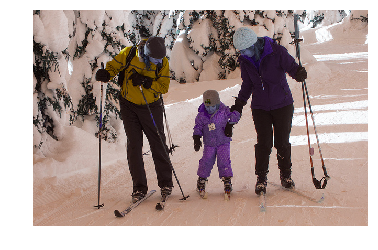

In [14]:
img = cv2.imread(img_path.as_posix())
plt.axis('off')
plt.imshow(img)
plt.show()

In [15]:
catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

[1, 1, 1, 35, 35, 35, 27]


[{'segmentation': [[365.63, 348.56, 367.12, 360.43, 374.9, 361.91, 377.5, 357.09, 377.87, 352.64, 380.84, 345.97, 382.69, 341.52, 384.17, 334.84, 379.72, 325.94, 382.69, 320.38, 384.55, 315.56, 384.55, 311.11, 381.95, 302.95, 379.72, 289.97, 377.13, 276.62, 378.61, 263.27, 378.24, 251.03, 380.84, 241.76, 382.32, 230.64, 384.92, 221.0, 387.51, 214.69, 396.04, 202.82, 395.67, 198.0, 389.0, 195.04, 385.29, 194.3, 381.21, 194.3, 377.13, 191.33, 374.9, 187.25, 372.31, 185.4, 371.57, 185.02, 368.23, 182.8, 364.89, 179.83, 360.81, 175.75, 357.1, 172.79, 353.77, 159.81, 351.54, 155.36, 346.35, 153.13, 340.79, 152.02, 333.0, 152.39, 326.32, 156.1, 324.47, 164.26, 324.47, 171.3, 322.99, 177.24, 318.17, 185.4, 315.2, 190.96, 315.2, 196.52, 314.83, 200.23, 311.49, 205.05, 309.27, 208.02, 310.01, 214.69, 309.64, 219.88, 308.15, 225.07, 307.04, 228.41, 308.15, 235.83, 306.67, 238.42, 304.45, 241.76, 303.7, 249.18, 305.19, 257.34, 306.3, 261.79, 309.27, 265.87, 311.12, 268.46, 314.09, 269.57, 318.91,

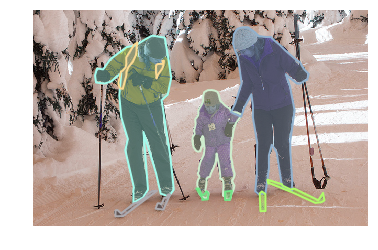

In [17]:
plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)

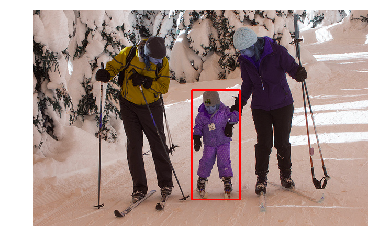

In [19]:
xmin, ymin, width, height = anns[0]['bbox']
xmin, ymin, width, height = int(xmin), int(ymin), int(width), int(height)
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()